# An Analysis of Tesla Inc Share Price and Option Pricing 

Importing the required and necessary libraries



In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
import scipy.stats as si

We source our selected S&P 500 stock (TESLA Inc.) data from yahoo finance, covering the period Oct 2020 to June 2021.   

In [4]:
tick='TSLA' 
start="2020-10-01"
end="2021-06-15"
df = yf.download(tick,start,end)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.tail() #view last 4 row of data (data frame)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-08,623.010010,623.090027,595.500000,603.590027,603.590027,26053400
2021-06-09,602.169983,611.789978,597.630005,598.780029,598.780029,16584600
2021-06-10,603.880005,616.590027,600.500000,610.119995,610.119995,23919600
2021-06-11,610.229980,612.559998,601.520020,609.890015,609.890015,16165000
2021-06-14,612.229980,625.489990,609.179993,617.690002,617.690002,20424000


# Data description and graghical visualization 

In [6]:
df=df['Adj Close'] #df now become a data series
df.describe().round(2) #describe data

count    177.00
mean     635.15
std      134.91
min      388.04
25%      571.69
50%      645.98
75%      714.63
max      883.09
Name: Adj Close, dtype: float64

In [7]:
Price = df[-1] #last entry of data - last price
print('The spot price is', round(Price,2))

The spot price is 617.69


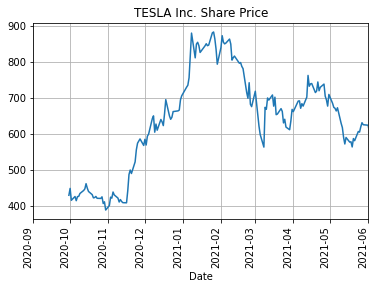

In [8]:
df.plot(label=tick)
plt.xlabel('Date')
plt.title('TESLA Inc. Share Price') 
plt.xticks(rotation=90)
plt.xlim('2020-09','2021-06')
plt.grid()

Calculation of the return and moving averages and add to new data frame

In [9]:
ret=np.log(df/df.shift(1)) #calculate log return
data=pd.concat([df,ret], axis=1) #combine two series and crate a data frame 
data.columns=['Price', 'Return'] #rename columns
data.dropna(inplace=True) #drop na values
data.tail()

,Price,Return
Date,,
2021-06-08,603.590027,-0.002548
2021-06-09,598.780029,-0.008001
2021-06-10,610.119995,0.018761
2021-06-11,609.890015,-0.000377
2021-06-14,617.690002,0.012708


In [10]:
w=5                                  
# 5 days moving averages as Tesla Inc. shares is volatile 
data['min'] = data['Price'].rolling(w).min()
data['max'] = data['Price'].rolling(w).max()
data['std'] = data['Price'].rolling(w).std()
data['mean'] = data['Price'].rolling(w).mean()
data['median'] = data['Price'].rolling(w).median()
data['ewma'] = data['Price'].ewm(halflife=0.5, min_periods=14).mean()
data.dropna().head()

,Price,Return,min,max,std,mean,median,ewma
Date,,,,,,,,
2020-10-20,421.940002,-0.020850,421.940002,461.299988,15.342202,440.523999,439.670013,424.891413
2020-10-21,422.640015,0.001658,421.940002,448.880005,11.519648,432.792004,430.829987,423.202864
2020-10-22,425.790009,0.007425,421.940002,439.670013,7.320924,428.174005,425.790009,425.143222
2020-10-23,420.630005,-0.012193,420.630005,430.829987,4.081454,424.366003,422.640015,421.758309
2020-10-26,420.279999,-0.000832,420.279999,425.790009,2.195733,422.256006,421.940002,420.649576


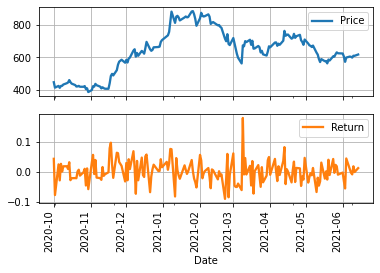

In [11]:
data[['Price','Return']].plot(subplots=True, lw=2.3, grid=True)
plt.xticks(rotation=90)
plt.show()

Visualizing the cummulative return

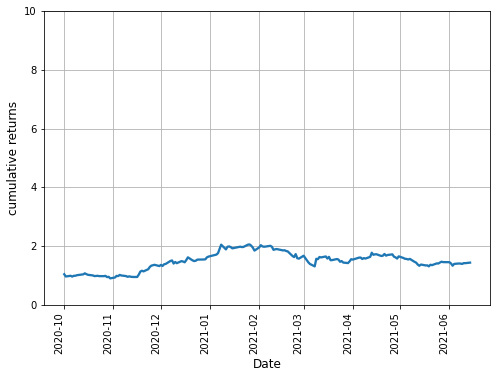

In [12]:
data['Return'].cumsum().apply(np.exp).plot(figsize=(8, 6), lw=2.3)
plt.grid(True)
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=12)
#plt.title('Tesla Inc. Shares Cumulative Returns', fontsize=20)
plt.ylabel('cumulative returns',fontsize=12)
plt.ylim(0,10)
plt.show()


Plotting the Distribution of Stock Return

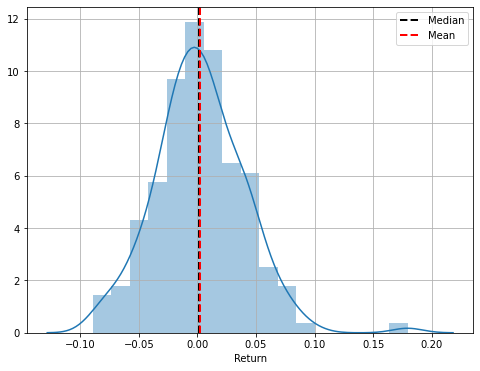

In [13]:
plt.figure(figsize=(8,6))
ax=sns.distplot(data['Return'])
ax.axvline(data['Return'].median(), color='black', ls='--', label='Median',lw=2)
ax.axvline(data['Return'].mean(), color='red', ls='--', label='Mean',lw=2)
plt.legend(loc=0)
plt.grid(True)


In [14]:
data['Return'].describe()

count    176.000000
mean       0.002071
std        0.038308
min       -0.089376
25%       -0.021134
50%        0.001557
75%        0.025300
max        0.179327
Name: Return, dtype: float64

# price comparison:
The 5 and 20 days moving averages is utilized in the price comparism.

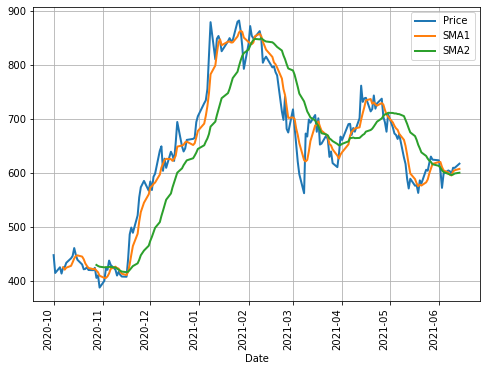

In [15]:
SMA1=5
SMA2=20
data['SMA1'] = data['Price'].rolling(window=SMA1).mean()
data['SMA2'] = data['Price'].rolling(window=SMA2).mean()
data[['Price', 'SMA1', 'SMA2']].plot(figsize=(8,6), grid=True, lw=2)
#plt.title('Moving Averages and Price')
plt.xticks(rotation=90)
plt.show()

# Option Pricing
# Monte Carlo simulation
this is a widely used model to simulate the price of an underlying assets. Here we use 3000 simulation to simulate prices. Then we use payoff function max(K-S,0) to value put option

In [26]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [27]:
T = 1/12                                              # one month maturity or time to expiration
r = 0.96/100                                          # US risk free rate as of December 08,2020
sigma = data['Return'].std()*np.sqrt(len(data))       #annual volatility 
S0 = data['Price'][-1]                                #last price of the stock
K = 625                                               #strike price
q=0                                                   #tesla do not pay dividend

In [28]:
S = mcs_simulation_np(3000) # 3000 simulations for the stock price
S = np.transpose(S)
S

array([[617.69000244, 616.14625531, 614.38950011, ..., 726.41358793,
        725.88788362, 725.25739257],
       [617.69000244, 617.61740782, 616.6089507 , ..., 550.46647917,
        549.80933567, 547.60730816],
       [617.69000244, 621.13577821, 621.11395956, ..., 590.44960572,
        590.18273616, 589.19064683],
       ...,
       [617.69000244, 617.17196835, 618.12180855, ..., 531.1496788 ,
        531.93202242, 534.15993148],
       [617.69000244, 620.21409306, 620.78291105, ..., 596.8601465 ,
        593.5247386 , 592.21055697],
       [617.69000244, 618.50686615, 620.17634874, ..., 583.22643004,
        584.68097025, 587.47173134]])

Text(0, 0.5, 'Frequency')

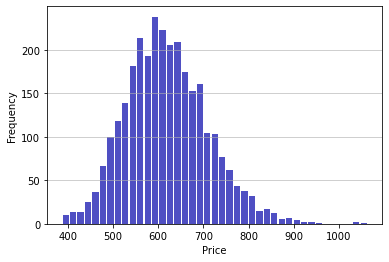

In [29]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Frequency')
#plt.title('Frequency distribution of the simulated end-of-preiod values')

In [30]:
print('Mean of Simulated Prices is {} and standard deviation is "{}!"'.format(S.mean().round(2), S.std().round(2)))

Mean of Simulated Prices is 617.83 and standard deviation is "63.66!"


In [31]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 39.03452696858572


# Black Scholes Merton Model

Black Scholes Merton model uses last price,strike, time to expiry, risk free rate, divident yield and annual volatility to price option. We use same values that we used for MCS to price put option unde BSM.

In [32]:
def euro_put_bsm(S, K, T, r, q, vol):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
 
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    #if payoff == "call":
        
    #option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    #elif payoff == "put":
    option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0,1.0)
    
    return option_value

In [33]:
euro_put_bsm(S0,K,T,r,q,sigma)

39.825788170784165

In [34]:
TX = np.linspace(0.25,3,12) #create 12 values between 0.25 and 3
cpd = np.zeros((len(TX),1))
for i in range(len(TX)):
    cpd [i] = euro_put_bsm(S0, K, TX[i], r, q, sigma) # for each maturity crate an option value

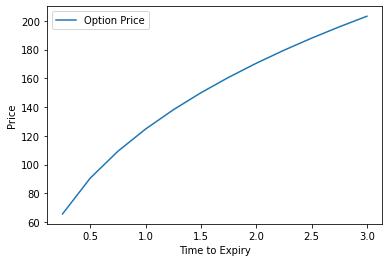

In [35]:
fig = plt.figure()
plt.plot(TX, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
#plt.title('European Put')
plt.legend(['Option Price'])

In [36]:
SI = np.linspace(300,900,11)               #start 300 and stop 900 with 11 points, tesla very volatile 
cp = np.zeros((len(SI),1))
for i in range(len(SI)):
    cp[i] = euro_put_bsm(SI[i], K, T, r, q, sigma)

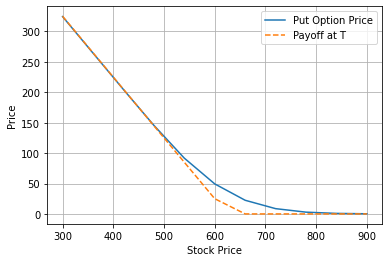

In [37]:
fig = plt.figure()
plt.plot(SI, cp, '-')                    #stock price and option prce
plt.plot(SI, np.maximum(K-SI,0), '--')   # stock price and payoff 
plt.xlabel('Stock Price')
plt.ylabel('Price')
#plt.title('European Put')
plt.legend(['Put Option Price','Payoff at T'])
plt.grid()


# Greeks
# Delta
The measure of option price sensitivity to stock price, first derivative of the option price with respect to stock price

In [38]:
def delta(S, K, T, r, q, vol):#use same parameters with BSM
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [39]:
delta(S0, K, T, r, q, sigma)

-0.5005519138022798

In [40]:
SD = np.linspace(S0-400,S0+500,51) #create an array for x axis
Delta_Put = np.zeros((len(SD),1))  #initiate delta as len(SD)x1 array 
for i in range(len(SD)):
    Delta_Put [i] = delta(SD[i], K, T, r, q, sigma)

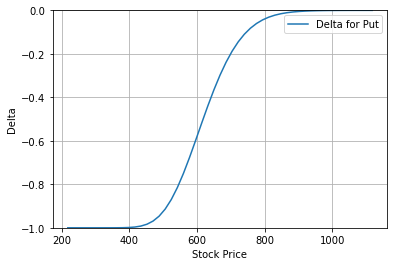

In [41]:
fig = plt.figure()
plt.plot(SD, Delta_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
#plt.title('Delta')
plt.ylim(-1,0)
plt.legend(['Delta for Put'])
plt.show()

In [42]:
SD1=np.linspace(S0-200,S0+200,51) #Instead of S, SD is taken to avoid variable changes 
TD=np.linspace(0.5,2,31)        #instead of T, we used TD because we use T for inital valuues above 
Delta = np.zeros((len(TD),len(SD1)))
for j in range(len(SD1)):
    for i in range(len(TD)):
        Delta[i,j] = delta(SD1[j], K, TD[i], r, q, r)

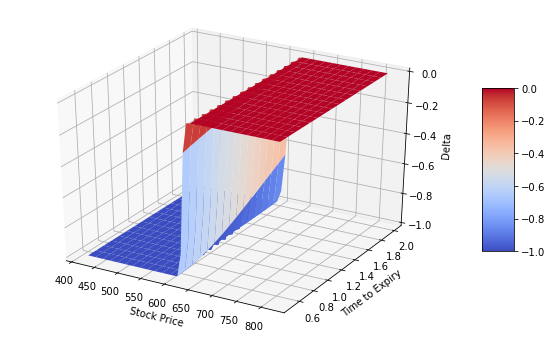

In [43]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d') #Get the current Axes instance on the current figure matching the given keyword args.
SD1, TD = np.meshgrid(SD1, TD) # extend dimention of the matrix (2D to 3D)
surf = ax.plot_surface(SD1, TD, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma¶
estimate delta sensitivity to price change of underlying

In [44]:
def gamma(S, K, T, r, q, vol):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * T)
    
    return gamma

In [45]:
gamma(S0, K, T, r, q, sigma)

0.015237771015978167

In [46]:
SG = np.linspace(S0-300,S0+300,21)
Gamma = np.zeros((len(SG),1))
for i in range(len(SG)):
    Gamma [i] = gamma(SG[i], K, T, r, q, sigma)

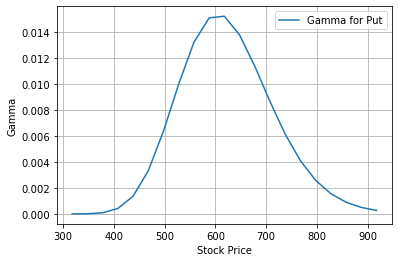

In [47]:
fig = plt.figure()
plt.plot(SG, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
#plt.title('Gamma')
plt.legend(['Gamma for Put'])

# Speed
measures gamma sensitivity to price change. It is third derivative of option price wrt stock price

In [48]:
def speed(S, K, T, r, q, vol):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * T) * (d1 + vol * np.sqrt(T))
    
    return speed

In [49]:
speed(S0,K,T,r,q,sigma)

7.059809150876539e-06

In [50]:
SP = np.linspace(S0-300,S0+300,21)
Speed = np.zeros((len(SP),1))
for i in range(len(SP)):
    Speed [i] = speed(SP[i], K, T, r, q, sigma)

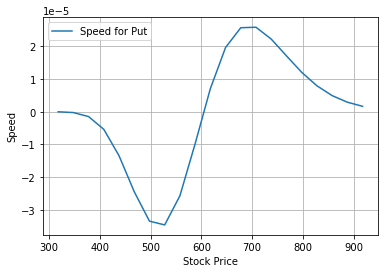

In [51]:
fig = plt.figure()
plt.plot(SP, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
#plt.title('Speed')
plt.legend(['Speed for Put'])

# Vega
estimate option price sensitivity to percent change in impled volatility

In [52]:
def vega(S, K, T, r, q, vol):
    # theata of put option
    #S: stock price
    #K: strike price 
    # r: annual risk free rate
    #q: divident yield
    #vol: annual volatility 
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [53]:
vega(S0, K, T, r, q, sigma)

71.13602593595935

In [54]:
vol = np.linspace(0.1,0.8,21)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(S0, K, T, r, q, vol[i])

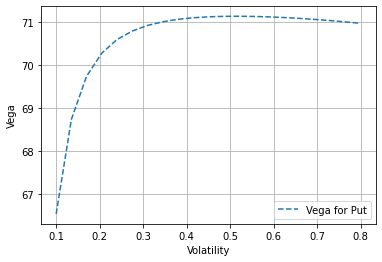

In [55]:
fig = plt.figure()
plt.plot(vol, Vega, '--')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
#plt.title('Vega')
plt.legend(['Vega for Put'])

In [56]:
SV = np.linspace(S0-300,S0+300,51)
TV = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(TV),len(SV)))
for j in range(len(SV)):
    for i in range(len(TV)):
        Vega[i,j] = vega(SV[j], K, TV[i], r, q, sigma)

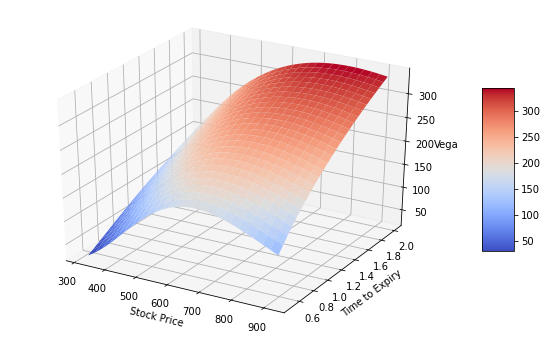

In [57]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d') #3d plot 
SV, TV = np.meshgrid(SV, TV) 
surf = ax.plot_surface(SV, TV, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

In [58]:
def theta(S, K, T, r, q, vol):
    # theata of put option
    #S: stock price
    #K: strike price 
    # r: annual risk free rate
    #q: divident yield
    #vol: annual volatility 
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [59]:
theta(S0, K, T, r, q, sigma )

220.26686594387414

In [60]:
TH= np.linspace(0.25,3,12)

Theta = np.zeros((len(TH),1))
for i in range(len(TH)):
    Theta[i] = theta(S0, K, TH[i], r, q, sigma)

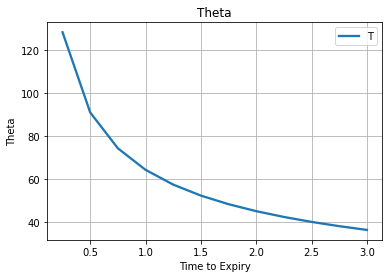

In [61]:
fig = plt.figure()
plt.plot(TH, Theta, '-', lw=2.3)
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend( 'Theta for Put')

In [62]:
SHX = np.linspace(S0-300,S0+300,51)
THX = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(THX),len(SHX)))
for j in range(len(SHX)):
    for i in range(len(THX)):
        Theta[i,j] = theta(SHX[j], K, THX[i], r, q, sigma)

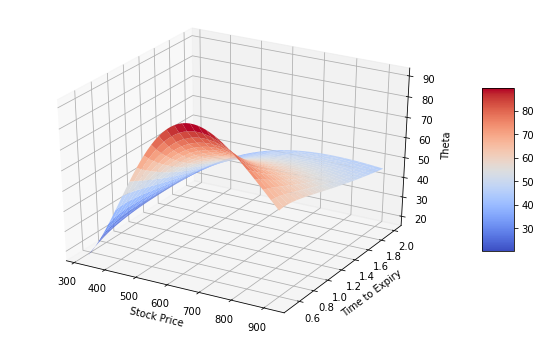

In [63]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
SHX, THX = np.meshgrid(SHX, THX)
surf = ax.plot_surface(SHX, THX, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);